<a href="https://colab.research.google.com/github/shab-sa/cs_internship/blob/main/Step10/Detect%20Handwriting%20Data-with%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import openml
import numpy as np
import pandas as pd

In [2]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=c93eecd13fe743c10792cfda7dbf5746b89f81e02db22488f812f5f682cad444
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=3d3e3c1df36aeafac8a17162f386b2bf18655f2c413eb9e0a71223157c089478
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built

In [4]:
pendigits = openml.datasets.get_dataset(32)
pendigits

<ipython-input-4-bbd468957ea0>:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  pendigits = openml.datasets.get_dataset(32)


OpenML Dataset
Name..........: pendigits
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:21:54
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/32/pendigits.arff
OpenML URL....: https://www.openml.org/d/32
# of features.: 17
# of instances: 10992

In [7]:
type(pendigits)

openml.datasets.dataset.OpenMLDataset

In [13]:
df = pendigits.get_data()
df

(       input1  input2  input3  input4  input5  input6  input7  input8  input9  \
 0        47.0   100.0    27.0    81.0    57.0    37.0    26.0     0.0     0.0   
 1         0.0    89.0    27.0   100.0    42.0    75.0    29.0    45.0    15.0   
 2         0.0    57.0    31.0    68.0    72.0    90.0   100.0   100.0    76.0   
 3         0.0   100.0     7.0    92.0     5.0    68.0    19.0    45.0    86.0   
 4         0.0    67.0    49.0    83.0   100.0   100.0    81.0    80.0    60.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 10987    36.0   100.0    24.0    70.0     0.0    38.0    49.0    33.0    95.0   
 10988    16.0    75.0    41.0   100.0    52.0    64.0    32.0    27.0     0.0   
 10989    56.0   100.0    27.0    79.0     0.0    39.0    12.0     0.0    66.0   
 10990    19.0   100.0     0.0    61.0     3.0    23.0    48.0     0.0    97.0   
 10991    38.0   100.0    37.0    81.0    12.0    55.0     0.0    28.0    52.0   
 
        input1

In [16]:
df=df[0]

In [17]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df_train = df[:7494]

In [26]:
import plotly.figure_factory as ff
import plotly.graph_objs as go

def plot_correlation(df):
    '''
    This function is resposible to plot a correlation map among features in the dataset
    '''
    corr = np.round(df.corr(), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])

    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = 'bluyl')

    fig.update_layout(title = {'text': '<b>Feature Correlation <br> <sup>Heatmap</sup></b>'},
                      height = 650, width = 650,
                      margin = dict(t=210, l = 80),
                      template = 'simple_white',
                      yaxis = dict(autorange = 'reversed'))

    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = 'bluyl',
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    fig.show()

In [27]:
plot_correlation(df)

<ipython-input-26-de42d712cc2b>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df_train = pd.read_csv("pendigits.tra", header = None)
df_test = pd.read_csv("pendigits.tes", header = None)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


In [ ]:
x_train = df_train.iloc[:,:16]
y_train = df_train.iloc[:,16]
x_test = df_test.iloc[:,:16]
y_test = df_test[16]

In [ ]:
print(f"Shape of x_train: {x_train.shape} and shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape} and shape of y_test: {y_test.shape}")

Shape of x_train: (7494, 16) and shape of y_train: (7494,)
Shape of x_test: (3498, 16) and shape of y_test: (3498,)


In [ ]:
import numpy as np
import sys
class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.


    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
        Dictionary collecting the cost, training accuracy,
        and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30, l2=0., epochs=100, eta=0.001, shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out
        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 * (np.sum(self.w_h ** 2.) + np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost

    def predict(self, X):

        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0] # no. of class
        #labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs)) # for progr. format.
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):
            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                bb = X_train.iloc[batch_idx]
                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(bb)

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]
                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels,
                # n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples,
                # n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train.iloc[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples,
                # n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)

            cost = self._compute_cost(y_enc=y_train_enc,
            output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)
            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
            (epoch_strlen, i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self


In [ ]:
nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=200, eta=0.0005, minibatch_size=100, shuffle=True, seed=1)

In [ ]:
nn.fit(X_train=x_train, y_train=y_train, X_valid=x_test[:1873], y_valid=y_test[:1873])

200/200 | Cost: 377.39 | Train/Valid Acc.: 99.80%/96.85%   

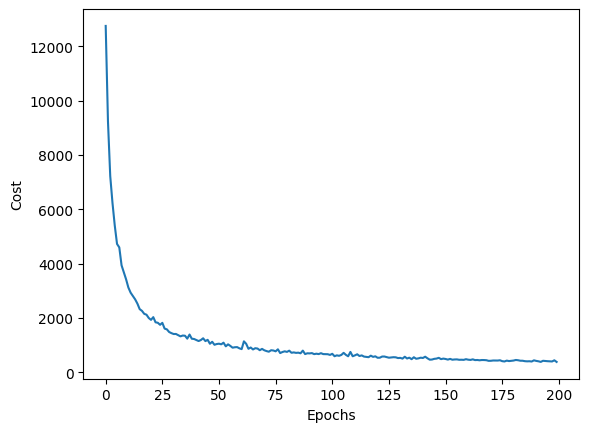

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

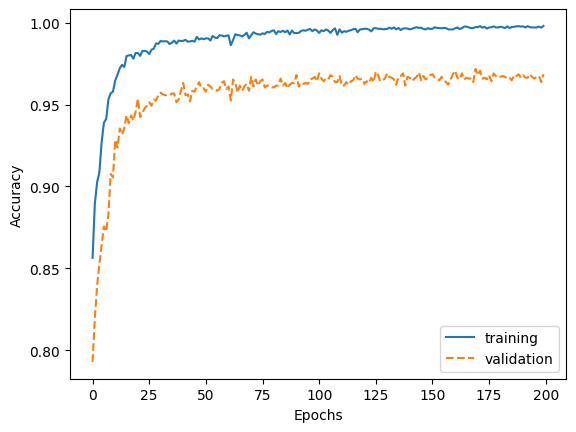

In [ ]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_test_pred = nn.predict(x_test[1873:])
acc = (np.sum(y_test[1873:] == y_test_pred).astype(float) / x_test[1873:].shape[0])
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 96.62%
